In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv('data/LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64))

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [34]:
classifier.predict([[4]])

array([0], dtype=int64)

In [35]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

In [36]:
y_pred = classifier.predict(X_test)
X_test, y_pred

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 array([1, 0, 1, 1], dtype=int64))

In [37]:
classifier.score(X_test, y_test)

0.75

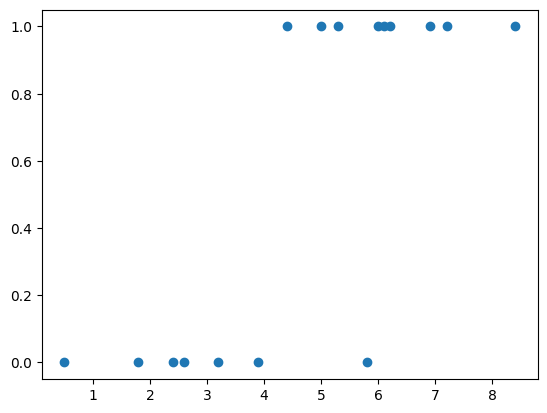

In [38]:
plt.scatter(X_train, y_train)
plt.show()

In [39]:
import numpy as np
X_range = np.arange(min(X), max(X), 0.1)
X_range

C:\Users\KOSMO\AppData\Local\Temp\ipykernel_2496\1177378884.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_range = np.arange(min(X), max(X), 0.1)


array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

In [40]:
y=classifier.coef_ * X_range + classifier.intercept_
p= 1/(1 + np.exp(-y))
p.shape

(1, 95)

In [41]:
p = p.reshape(-1)
p.shape

(95,)

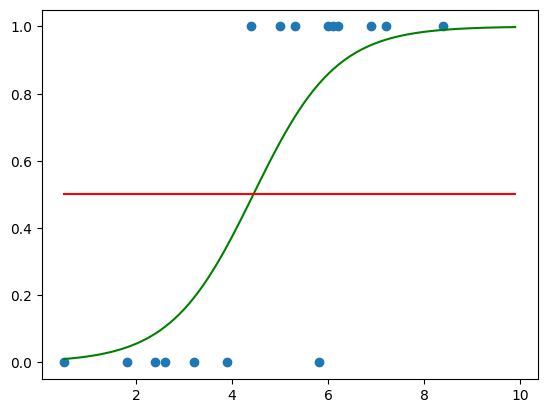

In [42]:
plt.scatter(X_train, y_train)
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.show()

In [43]:
classifier.predict([[4.5]])

array([1], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
y_pred, X_test

(array([1, 0, 1, 1], dtype=int64),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]))

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1, 1],
       [0, 2]], dtype=int64)

In [48]:
y_pred = classifier.predict(X_train)
y_pred, X_train

(array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64),
 array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]))

In [50]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[6, 1],
       [1, 8]], dtype=int64)